<a href="https://colab.research.google.com/github/Uday-ashes-uday/LSTM-Autoencoder/blob/main/LSTM_Autoencoder_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#get data
#--> unzip data


!unzip /content/drive/MyDrive/ECG5000.zip

Archive:  /content/drive/MyDrive/ECG5000.zip
  inflating: ECG5000.txt             
  inflating: ECG5000_TEST.arff       
  inflating: ECG5000_TEST.txt        
  inflating: ECG5000_TRAIN.arff      
  inflating: ECG5000_TRAIN.txt       
  inflating: ECG5000_TEST.ts         
  inflating: ECG5000_TRAIN.ts        


In [2]:
!pip install arff

  Preparing metadata (setup.py) ... done
  Created wheel for arff: filename=arff-0.9-py3-none-any.whl size=4949 sha256=6cd3c2b675f4088a8cc2afd67fa8a5bc96676a97e811e80d92f1eafa3fc5c536
  Stored in directory: /root/.cache/pip/wheels/0c/39/12/4d8ff491018bce2dd9cc6034298f27399c7f4fd4063187f7be
Successfully built arff


In [3]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import csv
import arff
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import torch

In [5]:
if torch.cuda.is_available():
  device='cuda'
else:
  device='cpu'

In [6]:
# @title convert .arff to pandas dataframe
from scipy.io import arff
import pandas as pd

data = arff.loadarff('/content/ECG5000_TRAIN.arff')
df = pd.DataFrame(data[0])

test_data=arff.loadarff('/content/ECG5000_TEST.arff')
t_df=pd.DataFrame(test_data[0])

In [7]:
#concat training and test dataframes

new_df=pd.concat([df,t_df])

#shuffle dataframe

data=new_df.sample(frac=1.0)

In [8]:
data

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
1001,1.469756,-1.048520,-3.394356,-4.254399,-4.162834,-3.822570,-3.003609,-1.799773,-1.500033,-1.025095,...,0.945178,1.275588,1.617218,1.580279,1.306195,1.351674,1.915517,1.672103,-1.039932,b'1'
2086,-1.998602,-3.770552,-4.267091,-4.256133,-3.515288,-2.554540,-1.699639,-1.566366,-1.038815,-0.425483,...,1.008577,1.024698,1.051141,1.015352,0.988475,1.050191,1.089509,1.465382,0.799517,b'1'
2153,-1.187772,-3.365038,-3.695653,-4.094781,-3.992549,-3.425381,-2.057643,-1.277729,-1.307397,-0.623098,...,1.085007,1.467196,1.413850,1.283822,0.923126,0.759235,0.932364,1.216265,-0.824489,b'1'
555,0.604969,-1.671363,-3.236131,-3.966465,-4.067820,-3.551897,-2.582864,-1.804755,-1.688151,-1.025897,...,0.545222,0.649363,0.986846,1.234495,1.280039,1.215985,1.617971,2.196543,0.023843,b'1'
205,-1.197203,-3.270123,-3.778723,-3.977574,-3.405060,-2.392634,-1.726322,-1.572748,-0.920075,-0.388731,...,0.828168,0.914338,1.063077,1.393479,1.469756,1.392281,1.144732,1.668263,1.734676,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3926,-0.248881,-1.346474,-1.855199,-2.519039,-2.947360,-3.233288,-3.087431,-2.668242,-1.970671,-1.390033,...,-1.157266,-1.605818,-2.286109,-3.247334,-3.551343,-3.426098,-2.171479,-1.380595,-0.378163,b'2'
466,-0.287286,-1.199089,-1.563916,-2.078314,-2.456073,-2.508211,-2.465002,-2.445333,-2.320656,-1.995150,...,-2.061417,-2.679767,-3.228270,-3.584828,-3.629377,-3.000843,-2.079477,-1.307187,0.075742,b'2'
2592,-1.032096,-2.811901,-3.588706,-3.883206,-3.279964,-2.275187,-1.771033,-1.603019,-0.956392,-0.764538,...,1.280471,1.353143,1.526594,1.429218,1.099634,1.245052,1.568047,1.776520,0.750669,b'1'
3272,-1.592541,-2.461370,-2.524132,-3.062815,-2.968224,-2.784655,-2.738399,-2.431311,-2.063169,-1.555809,...,-2.179744,-2.624303,-3.107874,-3.102964,-2.746384,-1.972664,-1.077676,-0.707541,0.354016,b'2'


In [9]:
class_names=['Normal','R on T','PVC','SP','UB']

In [10]:
#check amount of data available for each class

data['target'].value_counts()



b'1'    2919
b'2'    1767
b'4'     194
b'3'      96
b'5'      24
Name: target, dtype: int64

In [11]:
cl_names=np.unique(data['target'])
cl_names[0]

b'1'

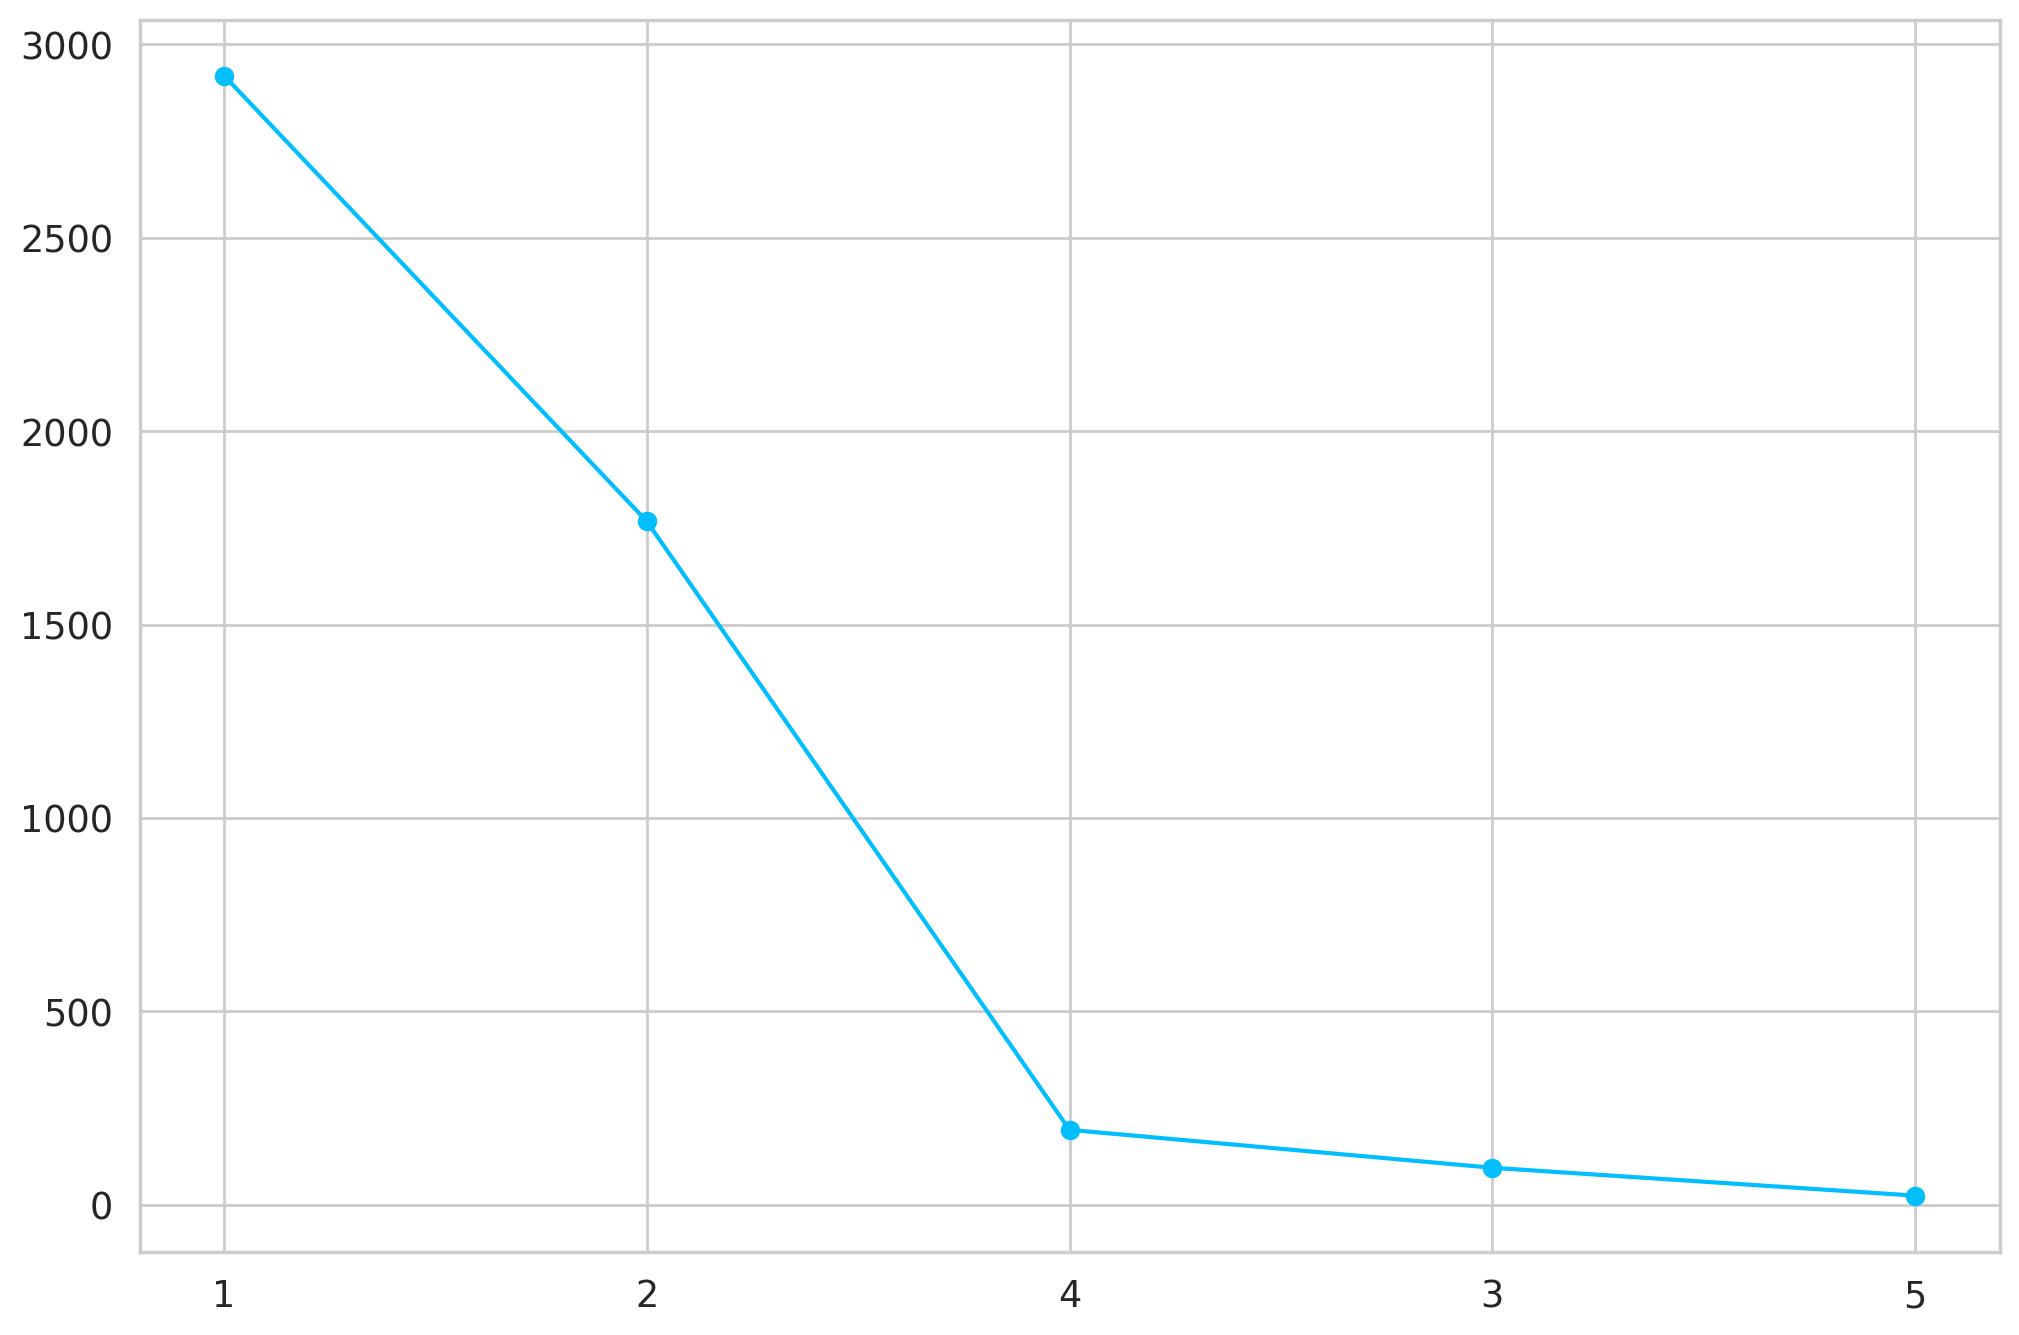

In [12]:
plt.plot(data['target'].value_counts(),marker='o');

In [13]:
# @title Data preprocessing

#dataframe of only normal class

normal_df=data[data['target']==cl_names[0]].drop('target',axis=1)


#dataframe of not normal class

anomaly_df=data[data['target']!=cl_names[0]].drop('target',axis=1)



In [14]:
normal_df.shape

(2919, 140)

In [15]:
anomaly_df.shape

(2081, 140)

In [16]:
#split normal data into train validation and test datasets
from sklearn.model_selection import train_test_split

train_df,valid_df=train_test_split(normal_df,test_size=0.15,random_state=101)

valid_df,test_df=train_test_split(valid_df,test_size=0.33,random_state=101)

In [17]:
train_df.shape,valid_df.shape,test_df.shape

((2481, 140), (293, 140), (145, 140))

In [18]:
train_df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att131,att132,att133,att134,att135,att136,att137,att138,att139,att140
1087,-0.006160,-1.834062,-3.032122,-4.413832,-4.369197,-3.648319,-2.596587,-1.674074,-1.529544,-0.904561,...,1.819710,1.722112,1.409091,1.212524,0.905282,0.299996,-0.054258,0.163218,0.566450,-0.848493
86,-1.249841,-3.380427,-3.919335,-3.795123,-3.853224,-3.860531,-2.267108,-1.429266,-1.483146,-0.961314,...,1.382744,1.219030,0.658364,-0.138916,-0.613060,-1.142856,-0.899102,-1.033704,-0.879945,-1.510429
682,-1.356295,-2.674097,-3.129238,-3.628629,-4.089734,-3.937861,-3.040222,-1.961040,-1.547837,-1.102871,...,1.522110,2.212686,2.227046,2.449504,2.275810,1.296518,-0.061304,-0.982092,-0.986383,-1.259142
115,0.458383,-1.375611,-3.357627,-4.074506,-4.147331,-3.885491,-3.423433,-2.206719,-1.562036,-1.422779,...,0.993596,1.129667,1.383067,1.551532,1.295211,0.825993,0.852609,0.947555,0.381856,-1.365053
673,1.883443,0.683965,-0.726982,-1.359900,-1.542762,-1.203945,-0.457925,0.240224,0.564252,0.816246,...,-1.125252,-1.024829,-0.946507,-1.033117,-1.286353,-1.480985,-1.329074,-1.191242,-1.758055,-3.783197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,-1.487426,-4.451908,-4.263508,-4.328205,-3.208435,-2.194549,-1.851962,-1.279205,-0.497476,-0.347615,...,0.274585,1.048987,1.319204,1.096621,1.022815,0.239643,-0.203018,-0.500633,0.543778,-0.451542
60,0.114271,-2.175108,-3.794647,-4.410312,-4.087260,-3.335413,-2.201042,-1.595560,-1.301546,-0.619414,...,0.961914,1.035745,1.403698,1.606524,1.647698,1.384917,1.372635,1.902030,2.072517,0.105450
931,2.052630,1.557905,-0.468934,-2.210767,-3.414199,-4.362142,-3.817230,-2.520502,-1.578292,-1.558623,...,-0.193002,0.662818,0.942242,0.821146,1.224657,1.190428,0.892449,-0.075519,-0.240375,0.456847
1702,-1.071676,-3.838079,-4.449824,-4.421966,-3.765435,-2.542878,-1.560992,-1.314799,-0.727074,-0.049407,...,0.681590,0.928644,1.133831,1.482672,1.557618,1.126709,0.766677,1.130290,1.983831,-0.091266


In [19]:
#make sequences
train_sequences=train_df.astype(np.float32).to_numpy().tolist()
valid_sequences=valid_df.astype(np.float32).to_numpy().tolist()
test_sequences=test_df.astype(np.float32).to_numpy().tolist()
anomaly_sequences=anomaly_df.astype(np.float32).to_numpy().tolist()

In [20]:
#get list of tensor type sequences

def create_dataset(sequences):
  dataset=[torch.tensor(s).unsqueeze(1) for s in sequences]
  n_seq,seq_len,n_features=torch.stack(dataset).shape
  return dataset,seq_len,n_features

In [21]:
train_dataset,seq_len,n_features=create_dataset(train_sequences)
valid_dataset,_,_=create_dataset(valid_sequences)
test_normal_dataset,_,_=create_dataset(test_sequences)

test_anomaly_dataset,_,_=create_dataset(anomaly_sequences)



In [22]:
# @title LSTM Autoencoder

#Encoder
import torch.nn as nn

class Encoder(nn.Module):

  def __init__(self,seq_len,n_features,embedding_dim=64):
    super().__init__()
    self.seq_len=seq_len
    self.embedding_dim=embedding_dim
    self.hidden_dim=2*embedding_dim
    self.n_feat=n_features

    self.rnn1=nn.LSTM(input_size=self.n_feat,hidden_size=self.hidden_dim,num_layers=1,batch_first=True)

    self.rnn2=nn.LSTM(input_size=self.hidden_dim,hidden_size=self.embedding_dim,num_layers=1,batch_first=True)

  def forward(self,x):
    x=x.reshape((1,self.seq_len,self.n_feat))

    x,(hidden_n,cell_n)=self.rnn1(x)
    x,(hidden_n,cell_n)=self.rnn2(x)

    return hidden_n.reshape((1,self.embedding_dim))



class Decoder(nn.Module):

  def __init__(self,seq_length,input_dim=64,output_dim=1):
    super().__init__()
    self.seq_len=seq_length
    self.input_dim=input_dim
    self.hidden_dim=2*self.input_dim
    self.output_dim=output_dim

    self.rnn1=nn.LSTM(input_size=input_dim,hidden_size=input_dim,num_layers=1,batch_first=True)
    self.rnn2=nn.LSTM(input_size=input_dim,hidden_size=self.hidden_dim,num_layers=1,batch_first=True)
    self.dense=nn.Linear(self.hidden_dim,self.output_dim)


  def forward(self,x):
    x=x.repeat(self.seq_len,1)
    x=x.reshape((1,self.seq_len,self.input_dim))

    x,(hidden_n,cell_n)=self.rnn1(x)
    x,(hidden_n,cell_n)=self.rnn2(x)
    x=x.reshape((self.seq_len,self.hidden_dim))

    return self.dense(x)


class RAE(nn.Module):

  def __init__(self,seq_len,n_features,embedding_dim=64):
    super().__init__()
    self.seq_len=seq_len
    self.n_features=n_features
    self.embedding_dim=embedding_dim

    self.encoder=Encoder(self.seq_len,self.n_features,self.embedding_dim)
    self.decoder=Decoder(self.seq_len,self.embedding_dim,self.n_features)


  def forward(self,x):
    x=self.encoder(x)
    x=self.decoder(x)
    return x

In [23]:
model_1=RAE(seq_len,n_features,embedding_dim=128)

In [24]:
for a in train_dataset:
  s=a
len(s)

140

In [25]:
v=model_1(s)
v.shape

torch.Size([140, 1])

In [30]:
# @title Training

def train_model(model,train_data,valid_data,n_epochs):

  #instantiate optimizer and loss function
  model=model.to(device)
  optimi=torch.optim.Adam(model.parameters())

  loss_fn=nn.L1Loss(reduction='sum').to(device)

  history=dict(train=[],val=[])

  for epoch in range(1,n_epochs+1):

    model=model.train()

    train_losses=[]

    val_losses=[]

    for seq in train_dataset:

      optimi.zero_grad()

      seq=seq.to(device)

      seq_pred=model(seq)

      #calculate loss

      loss=loss_fn(seq_pred,seq)

      loss.backward()

      optimi.step()

      train_losses.append(loss.item())

    model.eval()

    with torch.no_grad():
      for seq in valid_dataset:
        seq=seq.to(device)
        seq_preds=model(seq)
        loss=loss_fn(seq_preds,seq)
        val_losses.append(loss.item())

    train_loss=np.mean(train_losses)
    val_loss=np.mean(val_losses)
    history['train'].append(train_loss)
    history['val'].append(val_loss)

    print(f'Epoch {epoch} || train_loss {train_loss} || val_loss {val_loss}')

  return model.eval(),history














In [31]:
model,history=train_model(model_1,train_dataset,valid_dataset,n_epochs=150)

Epoch 1 || train_loss 41.12772409053927 || val_loss 40.77846457445581
Epoch 2 || train_loss 35.80133241724939 || val_loss 32.49764090918843
Epoch 3 || train_loss 30.864200357178053 || val_loss 30.867551230733305
Epoch 4 || train_loss 28.254528778688123 || val_loss 26.46306437274295
Epoch 5 || train_loss 26.551752985700972 || val_loss 26.4430904030393
Epoch 6 || train_loss 25.3463168019299 || val_loss 26.100988384806662
Epoch 7 || train_loss 49.859623084093286 || val_loss 45.763474220301916
Epoch 8 || train_loss 38.69507566511223 || val_loss 27.858822409203434
Epoch 9 || train_loss 30.595209907399507 || val_loss 35.499066050142154
Epoch 10 || train_loss 29.705874499175298 || val_loss 27.689886744111877
Epoch 11 || train_loss 25.557706129834422 || val_loss 26.80094830900329
Epoch 12 || train_loss 25.05979353955848 || val_loss 32.16534266292845
Epoch 13 || train_loss 25.903623605533646 || val_loss 30.643533918231014
Epoch 14 || train_loss 23.190692521832922 || val_loss 23.115118811154936


In [34]:
# @title making predictions


def predict(model,dataset):

  predictions,losses=[],[]
  loss_f=nn.L1Loss(reduction='sum').to(device)

  with torch.no_grad():
    model=model.eval()
    for seq in dataset:
      seq=seq.to(device)
      seq_pred=model(seq)

      loss=loss_f(seq,seq_pred)
      predictions.append(seq_pred.to('cpu').numpy().flatten())
      losses.append(loss.item())
  return predictions,losses


In [35]:
_,losses=predict(model_1,train_dataset)

In [37]:
len(losses)

2481

In [38]:
losses[1]

36.5025634765625

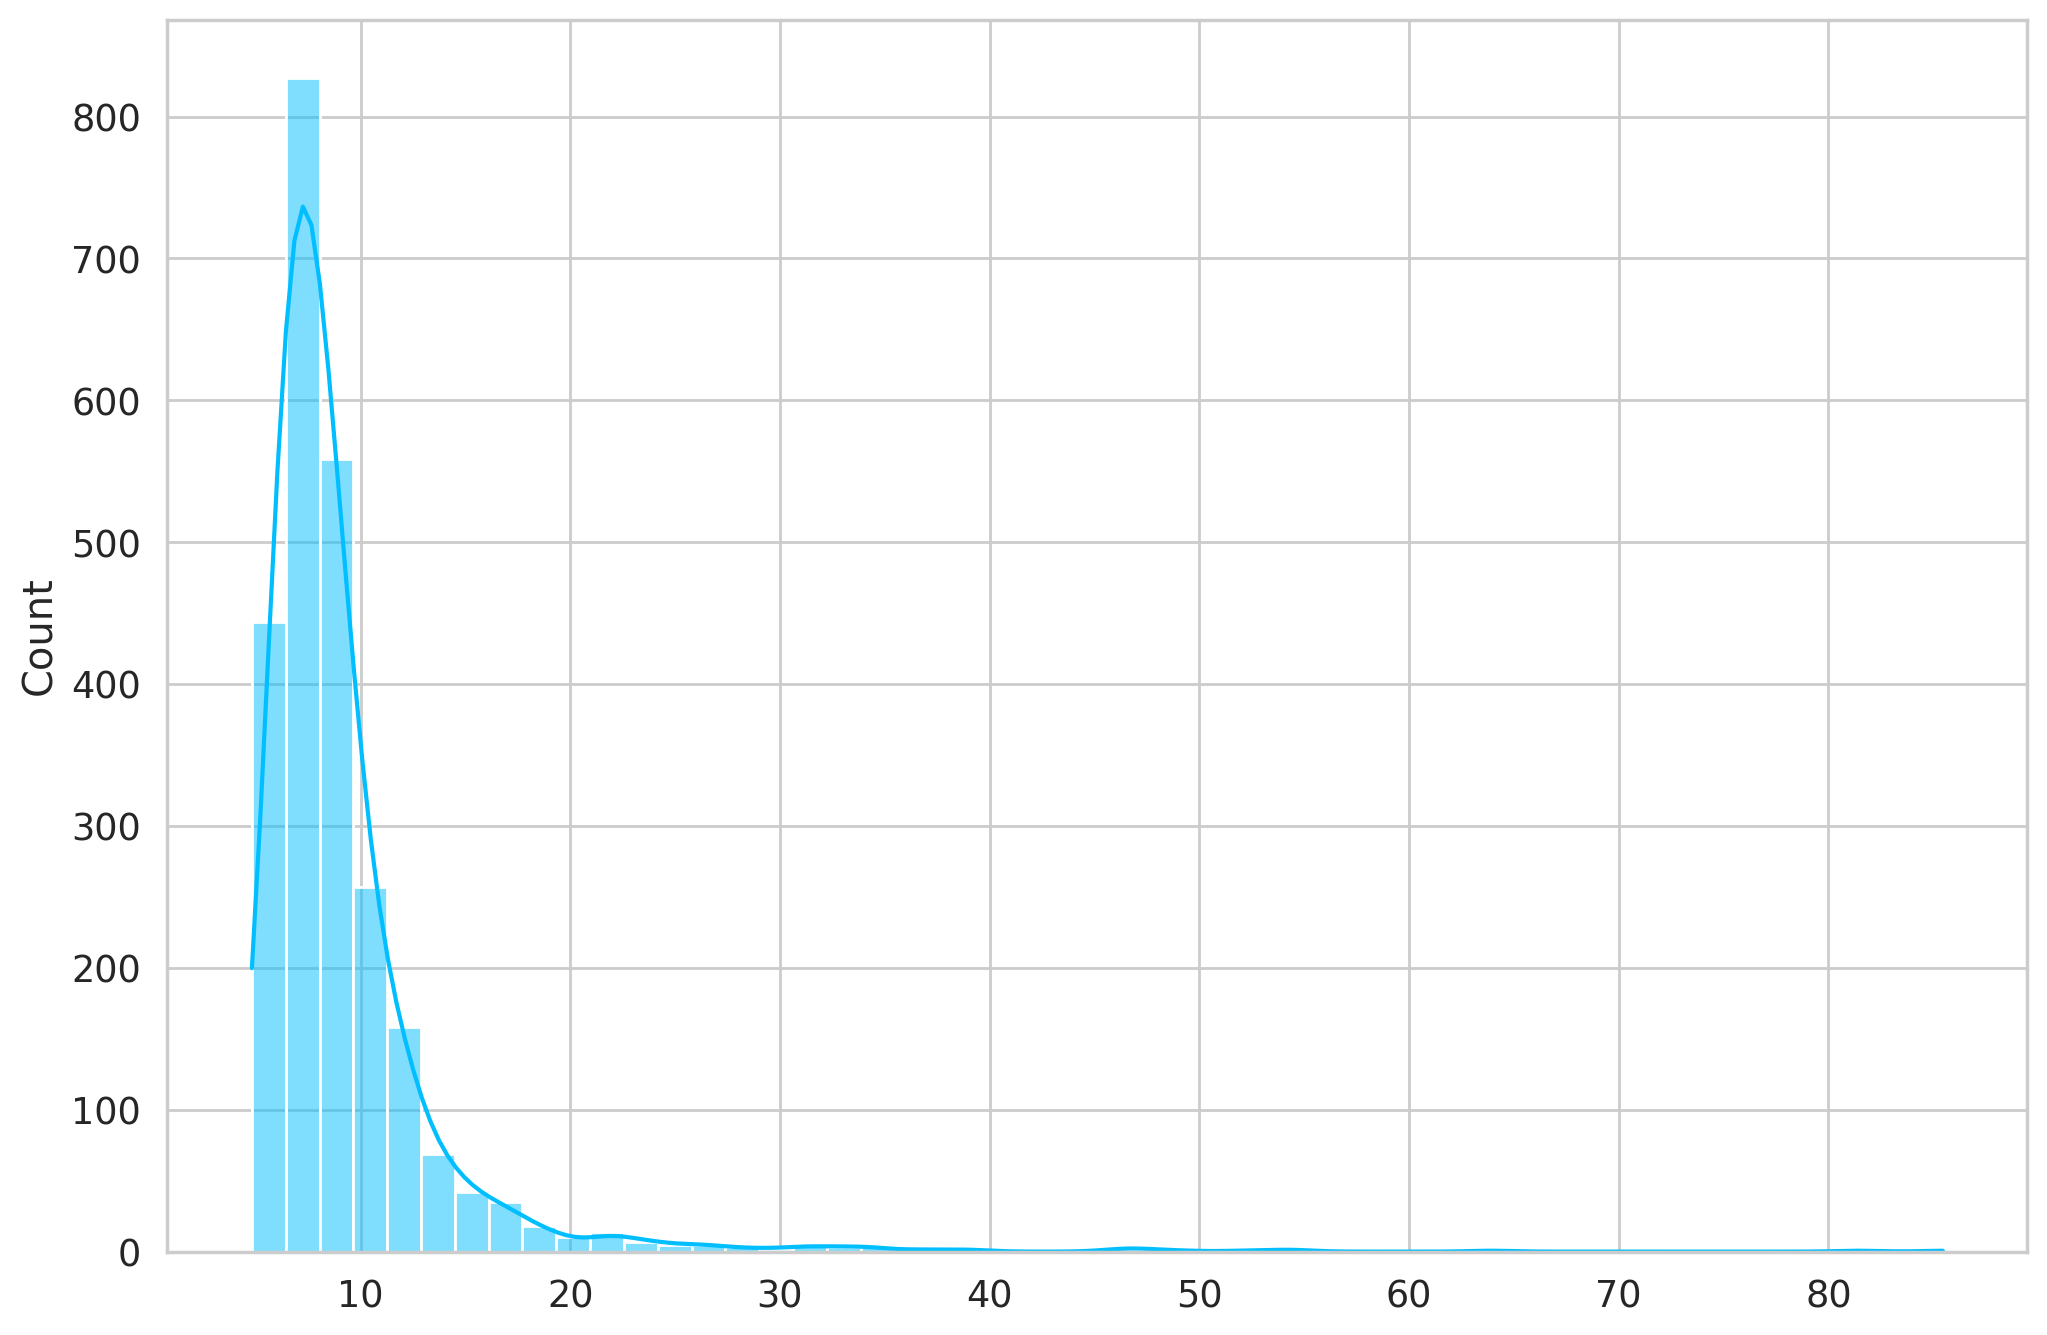

In [43]:
import seaborn as sns

sns.histplot(losses,bins=50,kde=True);

In [44]:
#set a threshold

THRESHOLD=26

<Axes: ylabel='Count'>

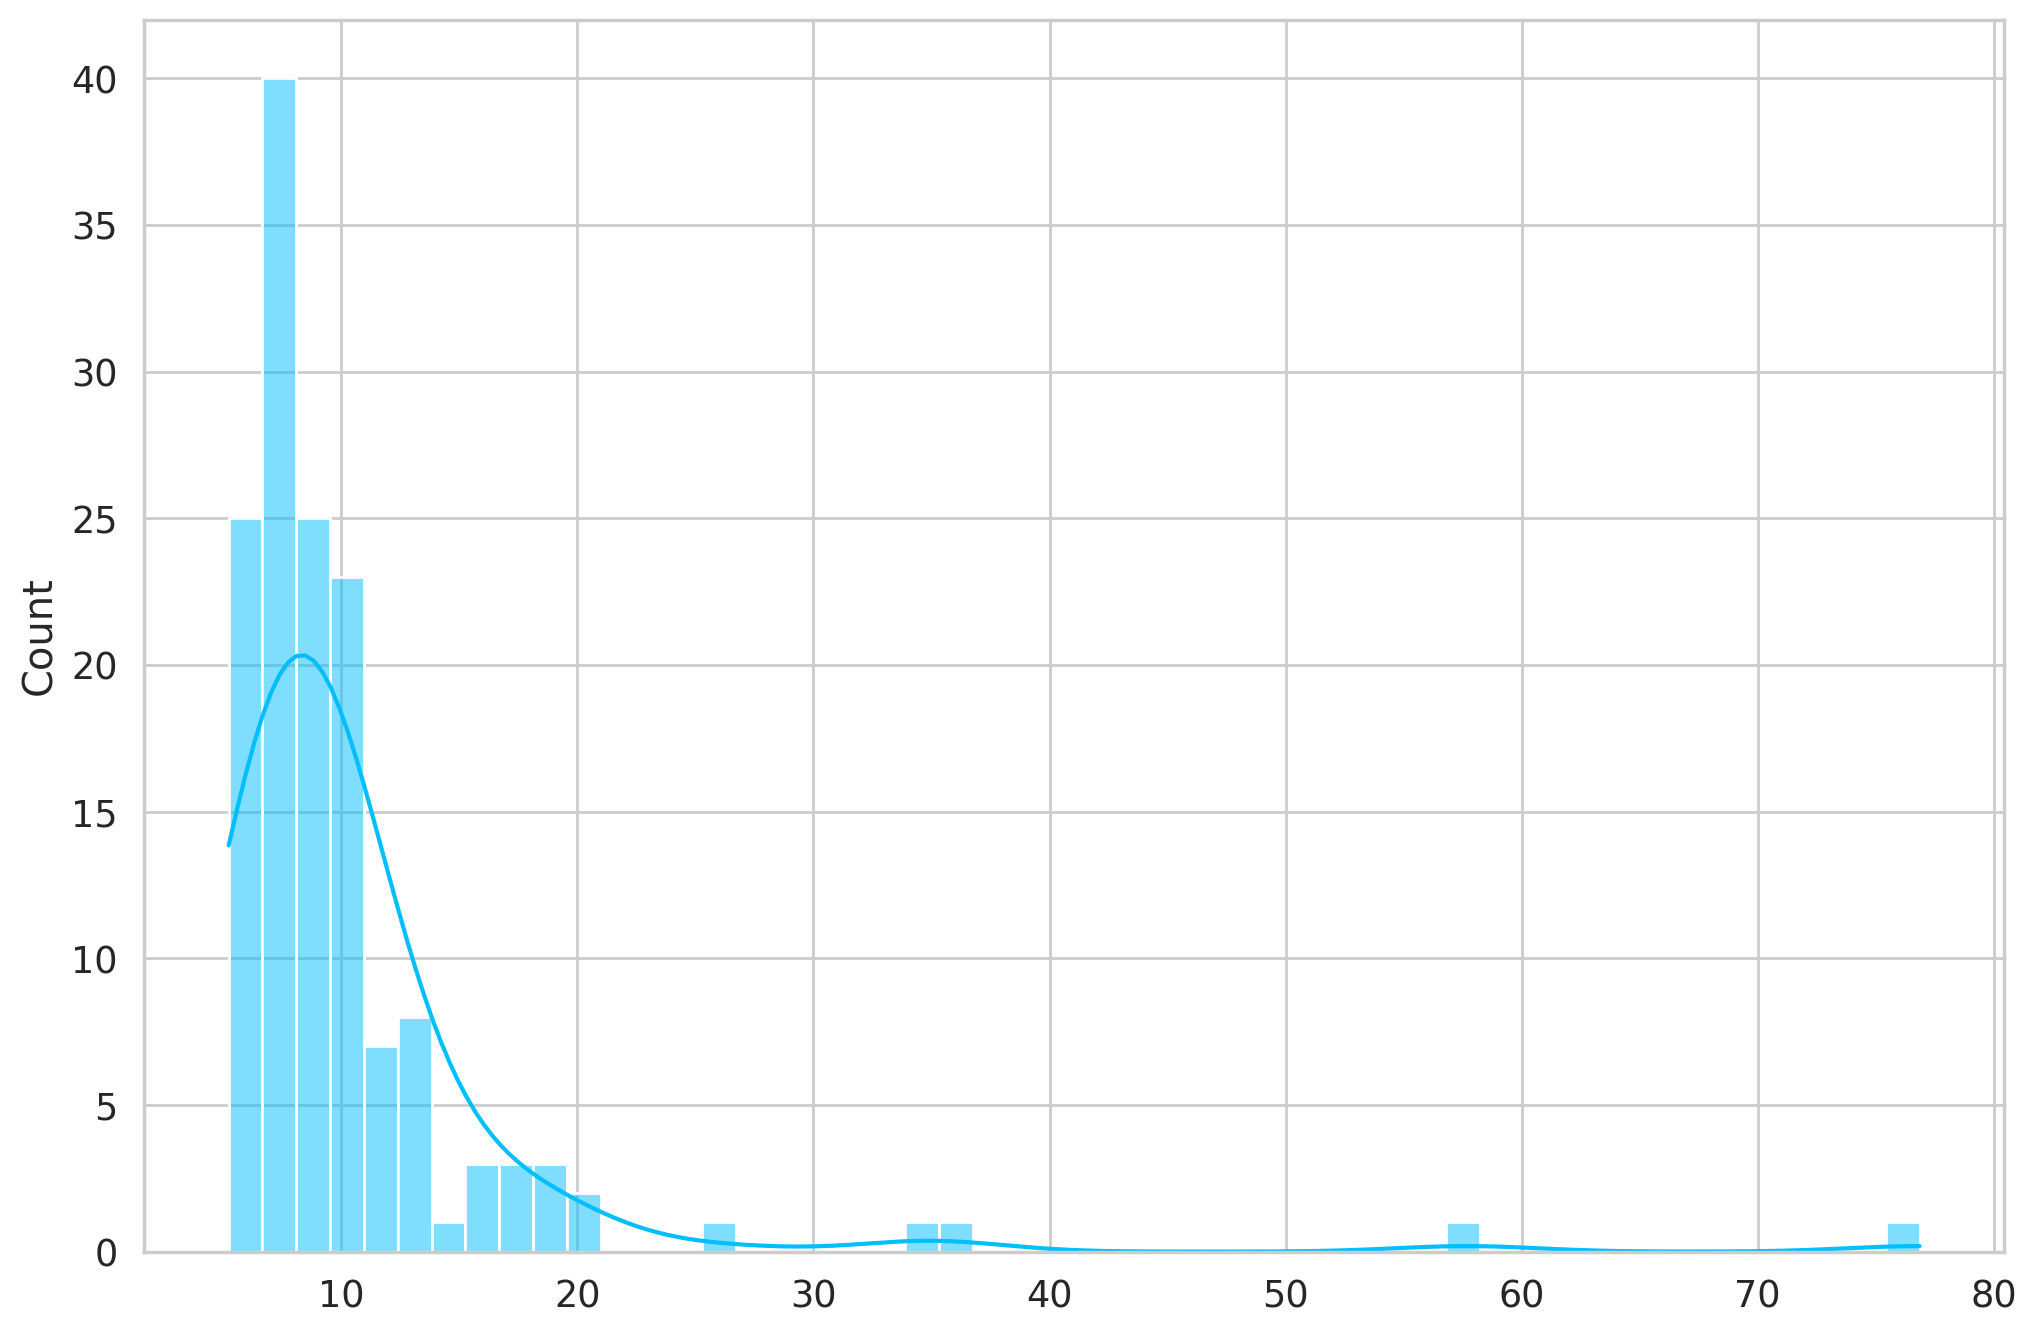

In [48]:
# @title Evaluation

# @markdown Normal heartbeat

predictions,pred_losses =predict(model_1,test_normal_dataset)

sns.histplot(pred_losses,bins=50,kde=True)

In [59]:
#check for number of values with losses greater than threshold value

correct=sum(l<=THRESHOLD for l in pred_losses)

print(f'normal predictions {correct/len(pred_losses):.2f}')

normal predictions 0.97


In [64]:
check_anoma=test_anomaly_dataset[:len(test_normal_dataset)]
len(check_anoma)

145

<Axes: ylabel='Count'>

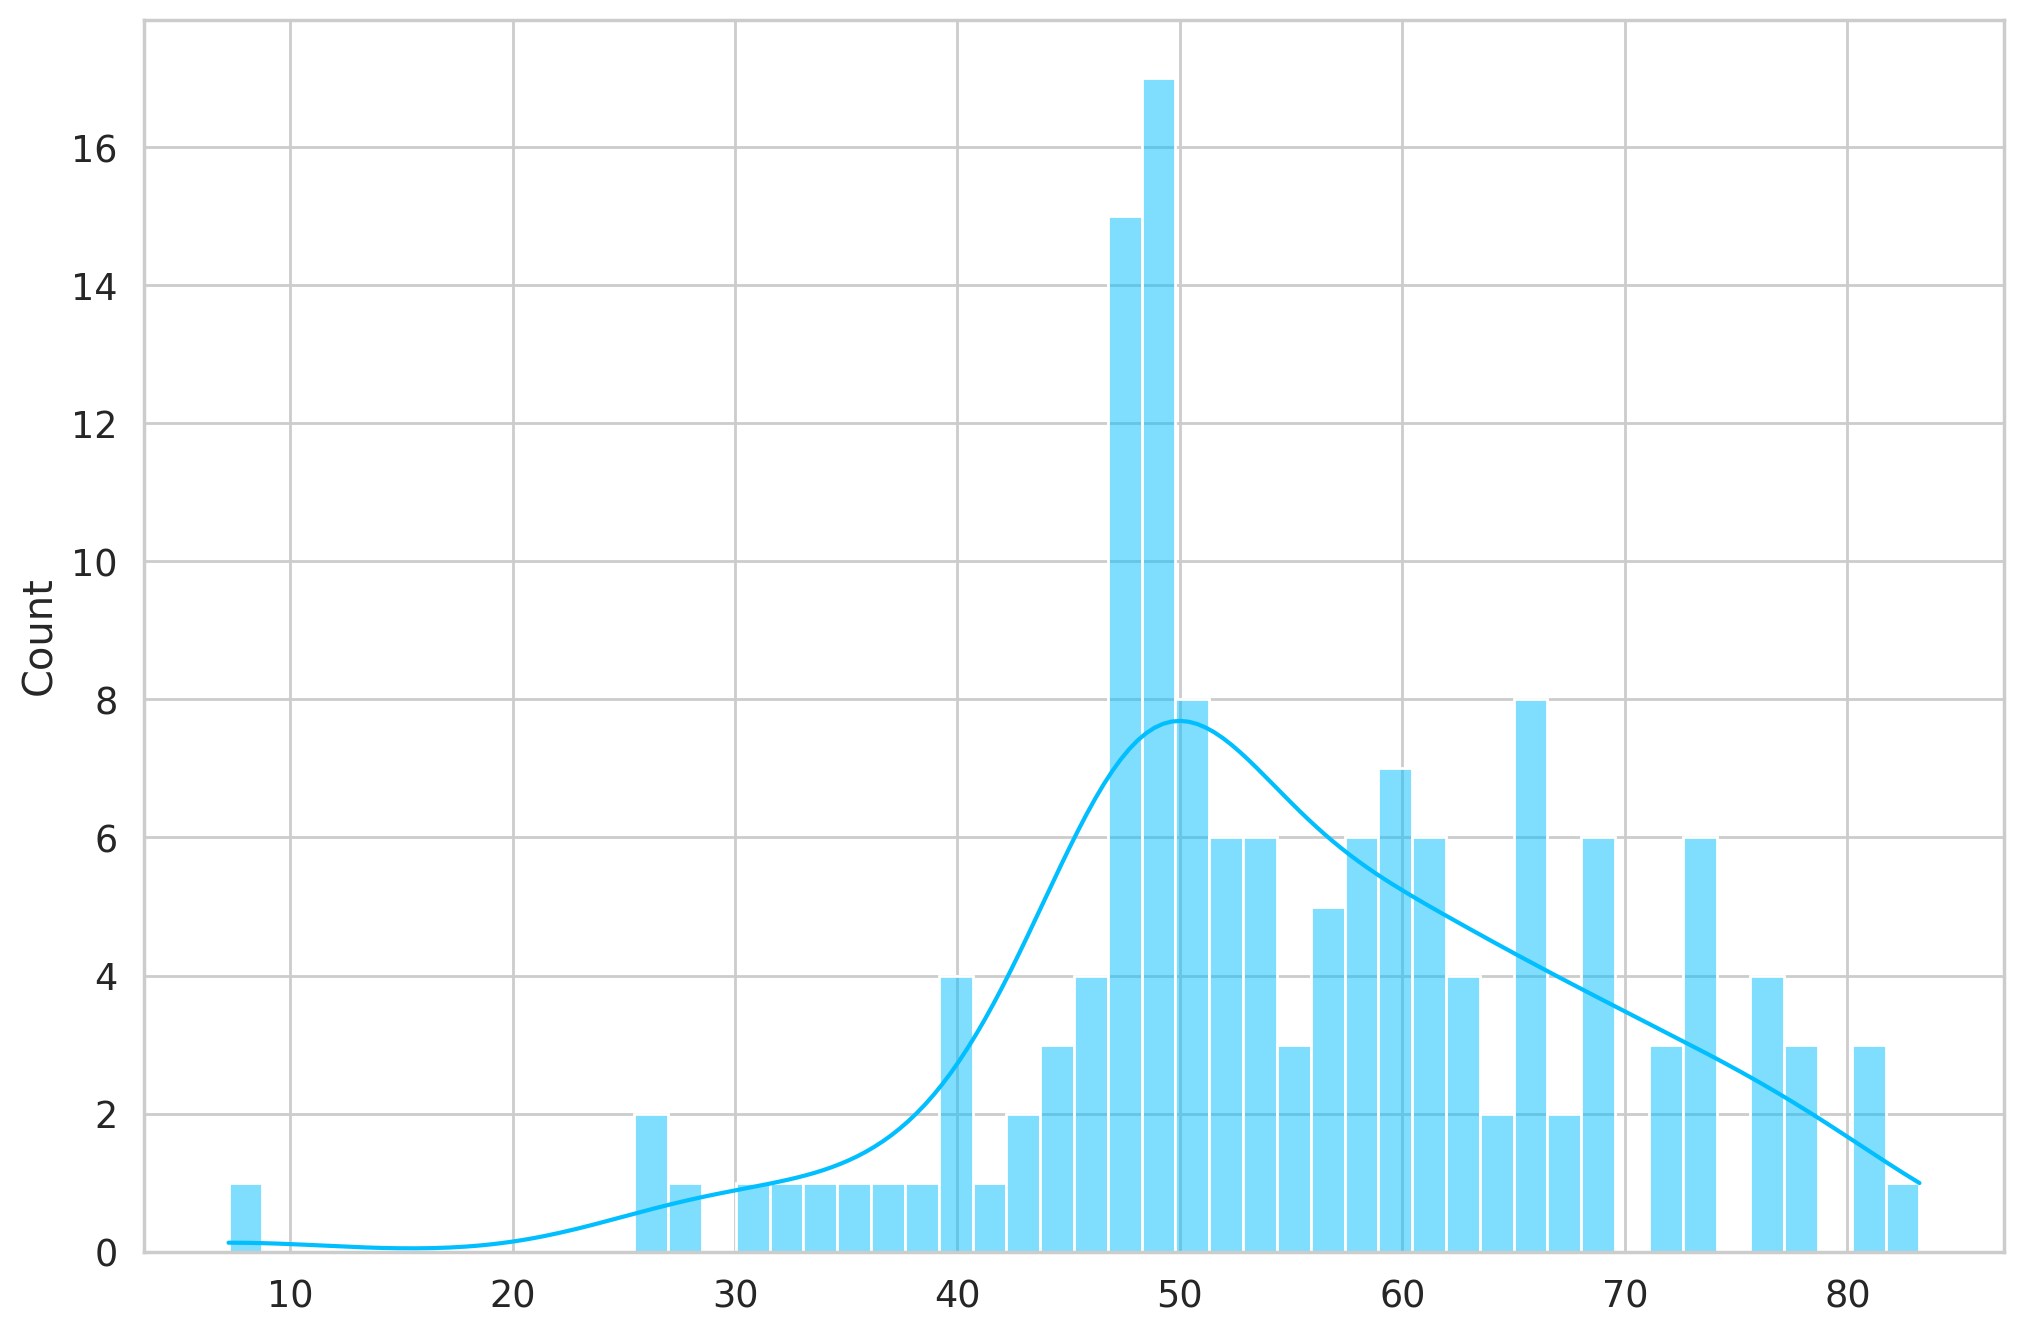

In [68]:
# @title Anomalies dataset

predictions,pred_losses_an =predict(model_1,check_anoma)

sns.histplot(pred_losses_an,bins=50,kde=True)

In [70]:
correct=sum(l<=THRESHOLD for l in pred_losses_an)

print(f'abnormal predictions {correct/len(pred_losses):.2f}')

abnormal predictions 0.01
